### XGBoost (eXtreme Gradient Boosting)

In [1]:
# Importing required libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from sklearn import metrics


In [2]:
# Reading the cleaned and processed data file.
df = pd.read_csv('./Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Removing the first column as this column is not useful for us in further processing.
df = df.drop(columns=df.columns[0], axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# Encoding all the categorical variables into integers.
df['class'] = df['class'].replace({'Economy': 0, 'Business': 1})
df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
df["airline"] = df["airline"].replace({'Indigo':0, 'AirAsia':1, 'GO_FIRST':2, 'SpiceJet':3, 'Air_India':4, 'Vistara':5})
df['source_city'] = df['source_city'].replace({'Delhi': 0, 'Mumbai': 1, 'Bangalore': 2, 'Kolkata': 3, 'Hyderabad': 4, 'Chennai': 5})
df['destination_city'] = df['destination_city'].replace({'Delhi': 0, 'Mumbai': 1, 'Bangalore': 2, 'Kolkata': 3, 'Hyderabad': 4, 'Chennai': 5})
df['departure_time'] = df['departure_time'].replace({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
df['arrival_time'] = df['departure_time'].replace({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

C:\Users\Aryan\AppData\Local\Temp\ipykernel_13392\908060521.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'Economy': 0, 'Business': 1})
C:\Users\Aryan\AppData\Local\Temp\ipykernel_13392\908060521.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
C:\Users\Aryan\AppData\Local\Temp\ipykernel_13392\908060521.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To

In [5]:
# Excluding the below columnns from the Training and Testing data.
columns_to_exclude = ['flight', 'price']

# Creating a new DataFrame for the Training data and Testing data.
x = df.drop(columns=columns_to_exclude)
y = df[['price']]

In [6]:
selection = ExtraTreesRegressor()
selection.fit(x, y)

# Finding the importance of each input feature.
print('Feature: Importance')
for feature_name, feature_importance in zip(x.columns, selection.feature_importances_):
    print(f"{feature_name}: {feature_importance}")

c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature: Importance
airline: 0.011631442121765938
source_city: 0.01055120474403992
departure_time: 0.003194845149432008
stops: 0.032691736547393824
arrival_time: 0.0032426644207721412
destination_city: 0.010135586818137315
class: 0.8805641113450968
duration: 0.02982494552388943
days_left: 0.018163463329472586


In [7]:
# Splitting the dataset into Training and Testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [8]:
# Scaling the data.
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
# Fitting and Training the model.
regressor = xgb.XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
y_pred = regressor.predict(x_test)

In [11]:
# Score for Training data.
regressor.score(x_train,y_train)

0.9765582126142447

In [12]:
# Score for Testing data.
regressor.score(x_test,y_test)

0.9744202057053709

C:\Users\Aryan\AppData\Local\Temp\ipykernel_13392\737030646.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


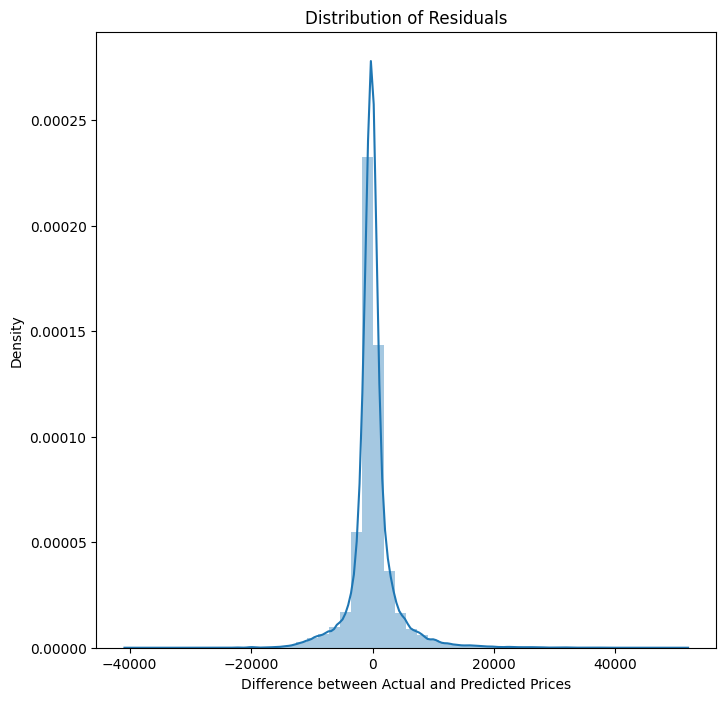

In [13]:
# Visualising the difference between Actual and Predicted Prices.
y_test = y_test.values.flatten() if hasattr(y_test, 'values') else y_test
y_pred = y_pred.flatten() if hasattr(y_pred, 'flatten') else y_pred

plt.figure(figsize=(8, 8))
sns.distplot(y_test - y_pred)
plt.xlabel('Difference between Actual and Predicted Prices')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()


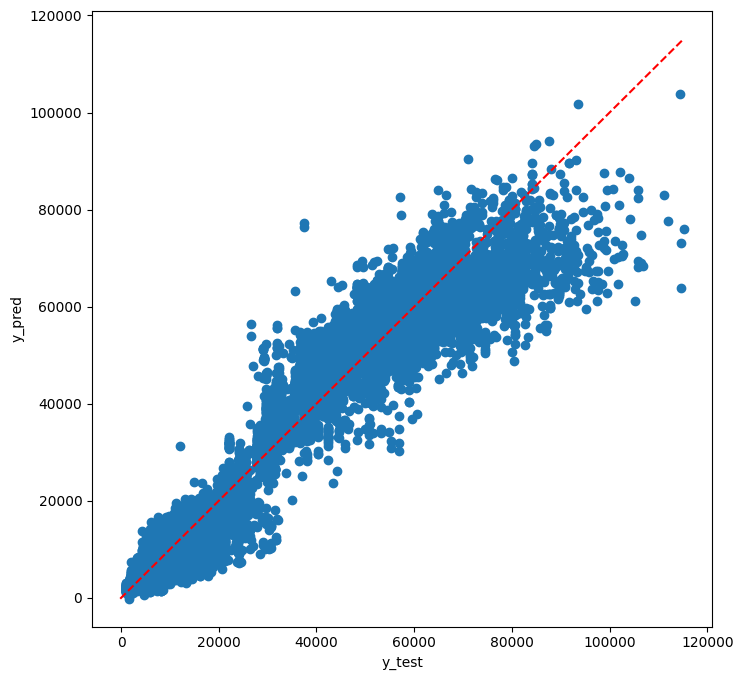

In [14]:
# Visualising the difference between Actual and Predicted Prices.
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

# Here, we are adding the y = x line in red color to observe the variation between the Actual Price and Predicted Price.
max_val = max(max(y_test.squeeze()), max(y_pred.squeeze()))
min_val = min(min(y_test.squeeze()), min(y_pred.squeeze()))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()

In [15]:
# Evaluating our model.
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 2049.649899893183
MSE: 13185930.520419454
RMSE: 3631.2436602931857


In [16]:
# R2-Score
metrics.r2_score(y_test,y_pred)

0.9744202057053709

## Conclusion

Based on the above graphs and evaluation metrics, we can infer that while the model seems to perform reasonably well (as shown by the concentration of points around the line of perfect prediction), it does have instances where the predictions are quite far off, especially with larger values. This is indicated by the high MSE and RMSE, which indicate a greater penalty for these large errors. On comparing this model to the Decision Tree algorithm, we can infer that this is a better model.